In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

In [6]:
df=data.head(10)

Univariate Analysis

In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

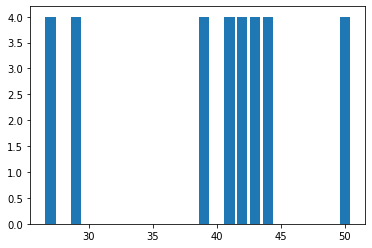

In [8]:
plt.bar (df['Age'],4)

Bivariate Analysis

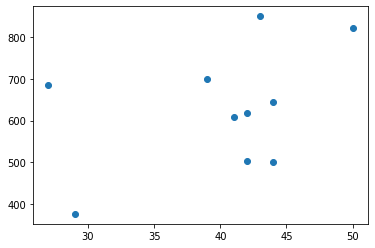

In [9]:
plt.scatter(df['Age'],df['CreditScore'])

Multivariate analysis

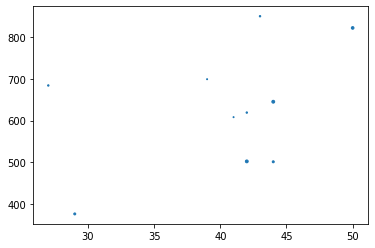

In [10]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

 Perform descriptive statistics on the dataset

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling Missing values

In [12]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Find the outliers and replace the outliers

Finding Outliners

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


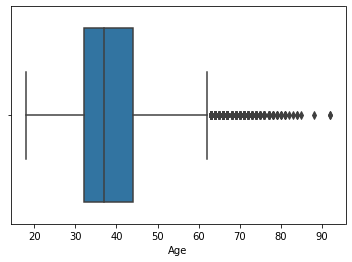

In [13]:
sns.boxplot(data['Age'])

Removing outliners

In [14]:
q=data.quantile(q=[0.75,0.5])

In [15]:
iqr=q.iloc[0]-q.iloc[1]

In [16]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [18]:
l=q.iloc[1]-(1.5*iqr)

In [20]:
l['Age']

26.5

In [21]:
u=q.iloc[1]+(1.5*iqr)

In [22]:
u['Age']

47.5

In [23]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


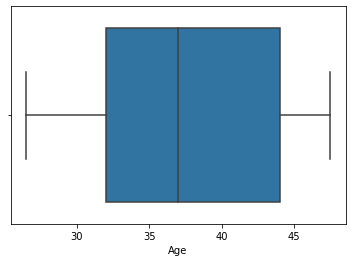

In [24]:
sns.boxplot(data['Age'])

 Check for Categorical columns and perform encoding.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [27]:
le=LabelEncoder()

In [28]:
data['Surname']=le.fit_transform(data['Surname'])

In [29]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [30]:
data['Geography']=le.fit_transform(data['Geography'])

In [31]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])

In [32]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52,1


Split the data into dependent and independent variables.

Independent Variables

In [33]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42.0,3,75075.31,2,1,0,92888.52


Dependent Variables

In [34]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Scale the independent variables


In [35]:
from sklearn.preprocessing import scale

In [36]:
scale(x)


array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

Split the data into training and testing

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7651,7652,15776921,987,431,1,0,45.0,5,83624.55,2,0,0,36899.62
5799,5800,15649853,630,625,0,1,45.0,3,0.00,1,1,1,184474.15
4674,4675,15689492,223,850,1,0,41.0,1,176958.46,2,0,1,125806.30
9028,9029,15695299,1843,590,0,1,45.0,2,81828.22,1,1,0,52167.97
826,827,15660535,129,680,0,1,47.0,5,0.00,2,1,1,179843.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,4723,15805671,1598,648,0,0,32.0,0,0.00,1,0,1,117323.31
2328,2329,15664204,1775,706,2,0,29.0,2,0.00,2,1,1,18255.51
3614,3615,15747649,2547,558,1,1,36.0,0,126606.63,2,1,1,172363.52
2160,2161,15586821,214,727,0,0,28.0,5,0.00,2,0,1,19653.08


In [40]:
x_train.shape

(8000, 13)

In [41]:
y_train

7651    0
5799    1
4674    0
9028    0
826     0
       ..
4722    0
2328    0
3614    0
2160    0
7583    0
Name: Exited, Length: 8000, dtype: int64

In [42]:
y_train.shape

(8000,)

In [43]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
687,688,15579334,2774,769,1,1,45.0,5,126674.81,1,1,0,124118.71
3571,3572,15790336,2618,664,1,0,36.0,6,71142.77,2,1,0,122433.09
7206,7207,15770995,2458,753,1,1,47.0,1,131160.85,1,1,0,197444.69
603,604,15592387,371,566,0,0,30.0,5,0.00,1,1,0,54926.51
95,96,15699461,887,515,2,0,35.0,10,176273.95,1,0,1,121277.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,358,15661629,2268,522,2,0,34.0,9,126436.29,1,1,0,174248.52
9955,9956,15611338,1366,714,2,0,29.0,4,0.00,2,1,1,37605.90
6295,6296,15621550,1250,535,2,1,47.5,1,140292.58,3,0,0,69531.22
3292,3293,15757632,1243,496,0,1,41.0,1,176024.05,2,1,0,182337.98


In [44]:
x_test.shape

(2000, 13)

In [45]:
y_test

687     1
3571    0
7206    0
603     1
95      0
       ..
357     1
9955    0
6295    1
3292    0
6646    0
Name: Exited, Length: 2000, dtype: int64

In [46]:
y_test.shape

(2000,)